In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import shapiro


In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


def get__lower_and_upper_bounds():
    

In [4]:
lem_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
iqr_values = {}
for column in df.columns:
    q1 = df[lem_cols].quantile(0.25)
    q3 = df[lem_cols].quantile(0.75)
    iqr = q3 - q1
    iqr_values[column] = iqr
    Lq = q1 - (1.5*iqr)
    
    lower_outliers = {}
    for column in lem_cols:
        lower_outliers[column] = df[column][df[column] < Lq[column]]
        
    for column, outliers in lower_outliers.items():
        print(f"{column}: {outliers.tolist()}")

Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: [15.1]
Rainfall: []
Flyers: [-38]
Price: []
Sales: []


In [5]:
lem_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
iqr_values = {}
for column in lem_cols:
    q1 = df[lem_cols].quantile(0.25)
    q3 = df[lem_cols].quantile(0.75)
    iqr = q3 - q1
    iqr_values[column] = iqr
    uq = q3 + (1.5*iqr)
    
    upper_outliers = {}
    for column in lem_cols:
        upper_outliers[column] = df[column][df[column] > uq[column]]
        
    for column, outliers in upper_outliers.items():
        print(f"{column}: {outliers.tolist()}")

Temperature: [212.0]
Rainfall: [2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]
Flyers: [77, 80]
Price: []
Sales: [143, 158, 235, 534]
Temperature: [212.0]
Rainfall: [2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]
Flyers: [77, 80]
Price: []
Sales: [143, 158, 235, 534]
Temperature: [212.0]
Rainfall: [2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]
Flyers: [77, 80]
Price: []
Sales: [143, 158, 235, 534]
Temperature: [212.0]
Rainfall: [2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]
Flyers: [77, 80]
Price: []
Sales: [143, 158

In [6]:
outlier_table = []
for column, outliers in upper_outliers.items():
    outlier_table.append([column, ", ". join(map(str, outliers.tolist()))])
    
print(tabulate(outlier_table, headers=["Column", "Upper Outliers"], tablefmt="grid"))

+-------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column      | Upper Outliers                                                                                                                                                       |
+=============+======================================================================================================================================================================+
| Temperature | 212.0                                                                                                                                                                |
+-------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Rainfall    | 2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54

In [10]:
lem_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
iqr_values = {}
for column in lem_cols:
    q1 = df[lem_cols].quantile(0.25)
    q3 = df[lem_cols].quantile(0.75)
    iqr = q3 - q1
    iqr_values[column] = iqr
    LLq = q1 - (3*iqr)
    
    LL_outliers = {}
    for column in lem_cols:
        LL_outliers[column] = df[column][df[column] < LLq[column]]
        
    for column, outliers in LL_outliers.items():
        print(f"{column}: {outliers.tolist()}")

Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []


In [13]:
lem_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
iqr_values = {}
for column in lem_cols:
    q1 = df[lem_cols].quantile(0.25)
    q3 = df[lem_cols].quantile(0.75)
    iqr = q3 - q1
    iqr_values[column] = iqr
    UUq = q1 + (3*iqr)
    
    UU_outliers = {}
    for column in lem_cols:
        UU_outliers[column] = df[column][df[column] > UUq[column]]
        
    for column, outliers in LL_outliers.items():
        print(f"{column}: {outliers.tolist()}")

Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []
Temperature: []
Rainfall: []
Flyers: [-38]
Price: []
Sales: []


In [17]:
lem_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
for column in df.columns:
    _, p_value = shapiro(df[lem_cols])
    if p_value > .05:
        print(f"{column}: Normally distrubuted")
    else:
        print(f"{column}: Not normally distributed")

Date: Not normally distributed
Day: Not normally distributed
Temperature: Not normally distributed
Rainfall: Not normally distributed
Flyers: Not normally distributed
Price: Not normally distributed
Sales: Not normally distributed


In [18]:
from statsmodels.graphics.gofplots import qqplot


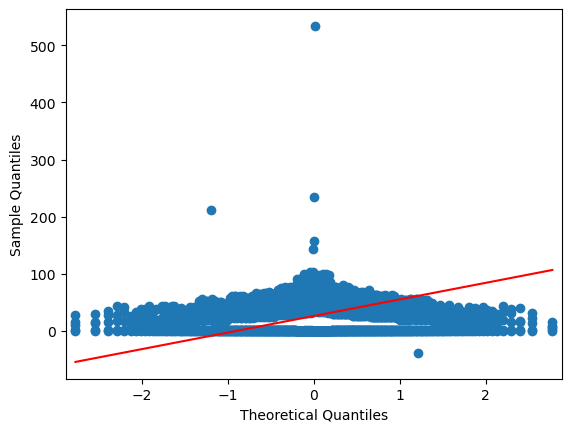

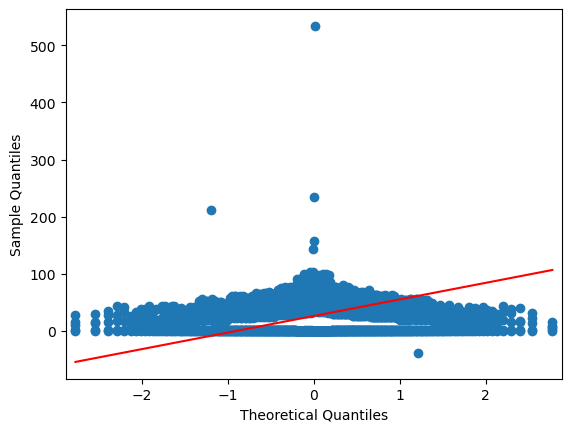

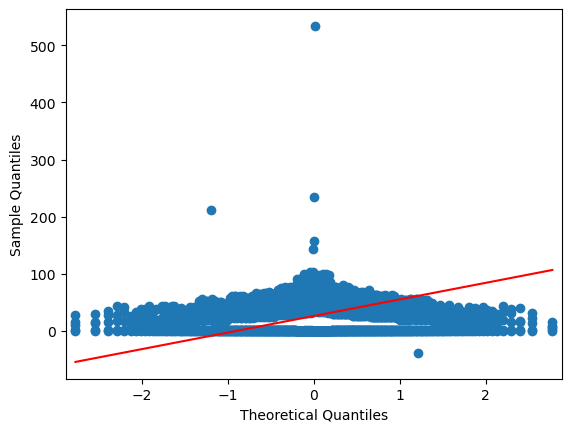

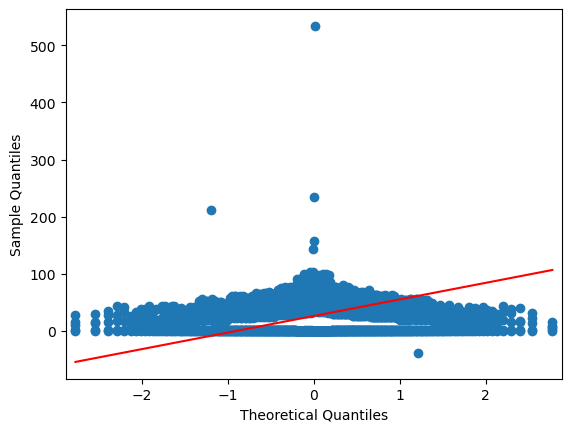

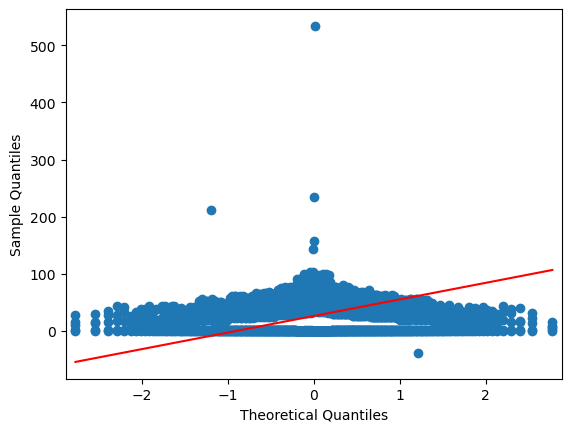

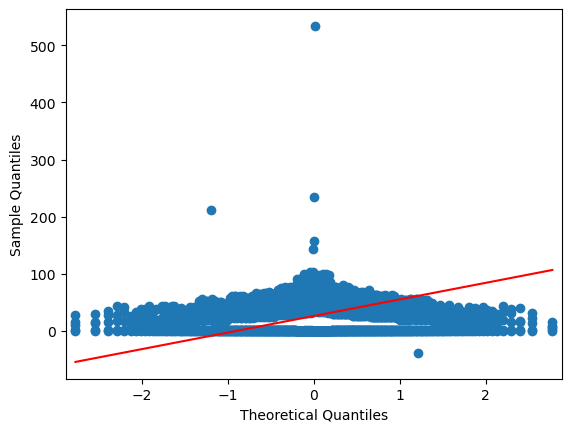

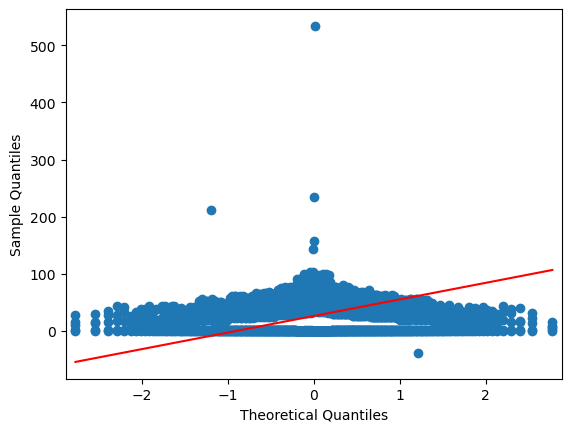

In [19]:
for colum in df.columns:
    qqplot(df[lem_cols], line='s')

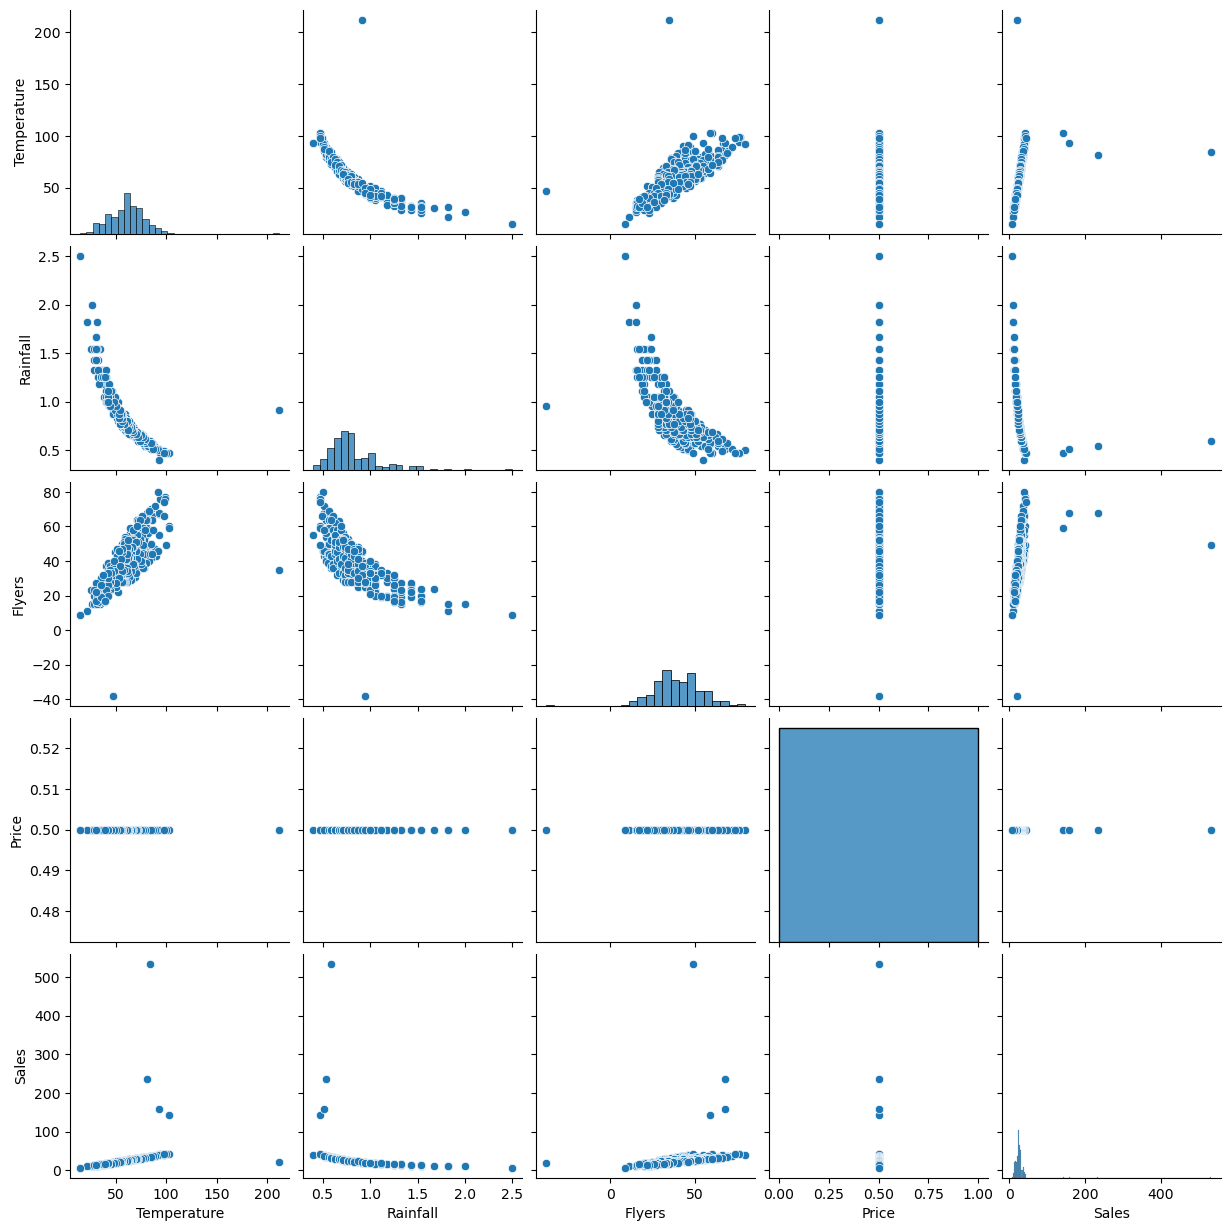

In [22]:
#lem_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

sns.pairplot(df)
plt.show()

In [ ]:
dd